# Enunciado  
## Entidades envolvidas

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidas na etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

class Apartamento:
    '''
    Classe Apartamento
    ------------------
    Detalhes
    Representa um apartamento do condomínio
    ------------------
    Atributos
    moradores: lista de objetos do tipo Morador
    numero: inteiro representando o número do apartamento
    '''
    def __init__(self, numero_apartamento):
        self.moradores = []
        if numero_apartamento<=0 or not(isinstance(numero_apartamento, int)):
            raise ValueError("O número do apartamento precisa ser um número inteiro maior que zero")
        self.__numero_apartamento = numero_apartamento
    
    def __repr__(self):
        return f"Lista de moradores: {self.moradores}"

    def visualizar_moradores(self):
        '''
        Método visualizar_moradores()
        -----------------------------
        Detalhes
        Exibe o nome de todos os moradores do apartamento
        -----------------------------
        Retorno
        None
        '''
        if len(self.moradores) <= 0:
            print('O apartamento está vazio.')
        else:
            print(f"Moradores do apartamento {self.__numero_apartamento}:")
            for morador in self.moradores:
                print(morador.nome)

    def buscar_morador(self, nome):
        '''
        Método buscar_morador(nome)
        -----------------------------------------------
        Detalhes
        Verifica se o morador existe na lista de moradores, retorna -1 caso não exista, ou um
        inteiro representando seu índice na lista de moradores do apartamento
        -----------------------------------------------
        Parâmetros
        nome:string representando o nome do morador a ser buscado
        -----------------------------------------------
        Retorno
        Int
        '''
        if len(self.moradores)>0:
            nomes=[morador.nome for morador in self.moradores]
            if nome in nomes:
                index=nomes.index(nome)
                return index
        return -1
    
    def adicionar_morador(self, morador):
        '''
        Método adicionar_morador(morador)
        ---------------------------------
        Detalhes
        Adiciona um morador na lista de moradores do apartamento
        ---------------------------------
        Parâmetros
        morador:objeto da classe Morador
        ---------------------------------
        Retorno
        None
        '''
        if isinstance(morador, Morador):
            index=self.buscar_morador(morador.nome)
            if index==-1:
                self.moradores.append(morador)

    def remover_morador(self, nome):
        '''
        Método remover_morador(nome)
        ----------------------------
        Detalhes
        Busca o nome do morador na lista de moradores, removendo o morador da lista caso ele seja encontrado
        ----------------------------
        Parâmetros
        nome:string representando o nome do morador a ser removido
        ----------------------------
        Retorno
        None
        '''
        index=self.buscar_morador(nome)
        if index!=-1:
            self.moradores.pop(index)
            print(f"Morador {nome} despejado com sucesso!")
        else:
            print("O morador não se encontra na lista de moradores deste apartamento.")

    @property
    def numero_apartamento(self):
        return self.__numero_apartamento

    @numero_apartamento.setter
    def numero_apartamento(self, valor):
        # if(not isinstance(valor, int) or valor <= 0):
        #     raise ValueError("O número do apartamento precisa ser um número inteiro maior que zero.")
        # self.__numero_apartamento = valor
        pass

class Morador:
    '''
    Classe Morador
    --------------
    Detalhes
    Representa um morador do condomínio
    --------------
    Atributos
    nome:string representando o nome do morador, default=None
    apartamento:um objeto da classe Apartamento, default=None
    --------------
    Exemplo
    bernardo = Morador('bernardo')
    claudionor = Morador('claudionor')
    roberta = Morador('roberta')
    '''
    apartamentos={}
    def __init__(self, nome=None, apartamento=None):
        if nome is not None:
            if not(isinstance(nome, str)):
                raise TypeError('O nome do morador precisa ser uma string ou None.')
        elif apartamento is not None:
            if not(isinstance(apartamento, Apartamento)):
                raise TypeError('O apartamento do morador precisa ser um objeto da classe Apartamento ou None.')
        if nome is None:
            nome=input("Digite o nome do morador: ")
        self.nome=nome
        if apartamento is None:
            numero_apartamento=0
            while (numero_apartamento<=0 or (numero_apartamento not in list(Morador.apartamentos.keys()))):
                numero_apartamento=int(input(f"Informe um número válido de apartamento {list(Morador.apartamentos.keys())}: "))
            self.apartamento=Morador.apartamentos[numero_apartamento]
            self.apartamento.adicionar_morador(self)
        else:
            apartamento.adicionar_morador(self)
            self.apartamento=apartamento
    
    def __repr__ (self):
        info = '{} do apartamento {}'.format(self.nome, self.apartamento.numero_apartamento)
        return info

    def votar(self, urna, voto=None): 
        '''
        Método votar(urna, voto)
        ------------------------
        Detalhes
        Declara o voto dos moradores de um apartamento
        ------------------------
        Parâmetros
        urna:objeto da classe Urna
        voto:inteiro representando o número do candidato que os moradores desejam eleger como síndico
        ------------------------
        Retorno
        None
        '''
        if voto is None or not(isinstance(voto, int)):
            voto=int(input("Informe o número do candidato (seu voto é secreto)"))
        urna.depositar_voto(self.apartamento, voto)

class Candidato(Morador):
    '''
    Classe Candidato(Morador)
    -------------------------
    Detalhes
    O candidato é um morador que irá disputador a eleição para síndico do condomínio
    -------------------------
    Atributos
    numero_candidato:inteiro maior que 0 representando o número do candidato, default=0
    quantidade_votos:inteiro maior ou igual a 0 representando o número de votos que o candidato obteve, default=0
    '''
    def __init__(self, nome=None, apartamento=None):
        super().__init__(nome, apartamento)

        self.__numero_candidato=0
        self.__quantidade_votos=0

    def imprimir_contagem_votos(self):
        return 'O candidato {} ({}), recebeu {} votos'.format(self.nome, self.__numero_candidato, self.__quantidade_votos)

    @property
    def numero_candidato(self):
        return self.__numero_candidato

    @numero_candidato.setter
    def numero_candidato(self, valor):
        self.__numero_candidato=valor

    @property
    def quantidade_votos(self):
        return self.__quantidade_votos

    @quantidade_votos.setter
    def quantidade_votos(self, valor):
        self.__quantidade_votos=valor

    def __repr__(self):
        return self.nome

class Urna:
    '''
    Classe Urna
    -----------
    Detalhes
    A urna é responsável pela contabilização de 
    votos da eleição para síndico do condomínio
    -----------
    Atributos
    apartamentos_restantes:dicionário no qual a chave é o número do apartamento
    que ainda não votou e o valor é um objeto da classe Apartamento, default={}
    apartamentos_votantes:dicionário no qual a chave é o número do apartamento
    que já votou e o valor é um objeto da classe Apartamento
    candidatos:dicionário no qual a chave é o número do candidato
    e o valor é um objeto da classe Candidato, default={}
    votacao_encerrada:valor lógico indicando se a votação foi encerrada, default=False
    '''
    ultimo_numero_cadastrado=0
    def __init__(self, apartamentos_restantes = {}):
        self.__apartamentos_votantes={}
        self.__votacao_encerrada=False
        self.__apartamentos_restantes=apartamentos_restantes.copy()
        self.__candidatos={}
        self.__votos_nulos=0

    @property
    def votos_nulos(self):
        return self.__votos_nulos

    @property
    def apartamentos_votantes(self):
        return self.__apartamentos_votantes

    @property
    def votacao_encerrada(self):
        return self.__votacao_encerrada

    @property
    def apartamentos_restantes(self):
        return self.__apartamentos_restantes

    @property
    def candidatos(self):
        return self.__candidatos

    @votos_nulos.setter
    def votos_nulos(self, valor):
        self.__votos_nulos=valor

    @apartamentos_votantes.setter
    def apartamentos_votantes(self, apartamento):
        if apartamento.numero_apartamento not in list(self.__apartamentos_votantes.keys()):
            self.__apartamentos_votantes[apartamento.numero_apartamento]=apartamento
        else:
            raise KeyError("Este apartamento já votou")
    
    @votacao_encerrada.setter
    def votacao_encerrada(self, valor):
        self.__votacao_encerrada=valor

    @apartamentos_restantes.setter
    def apartamentos_restantes(self, apartamento):
        if apartamento.numero_apartamento not in list(self.__apartamentos_restantes.keys()):
            self.__apartamentos_restantes[apartamento.numero_apartamento]=apartamento
        else:
            raise KeyError("Este apartamento já foi cadastrado")

    @candidatos.setter
    def candidatos(self, candidato):
        if candidato.numero_candidato not in list(self.__candidatos.keys()):
            self.__candidatos[candidato.numero_candidato]=candidato
        else:
            raise KeyError("Este candidato já foi cadastrado")
    
    def __repr__ (self):
        info = 'A urna possui os seguintes candidatos: {}.\nJá votaram os apartamentos: {}.\nFaltam votar os apartamentos: {}.' \
        .format(self.__candidados.keys(), self.__apartamentos_votantes, self.__apartamentos_restantes)
        return info

    def cadastrar_apartamento(self, apartamento):
        '''
        Método cadastrar_apartamento(apartamento)
        -----------------------------------------
        Detalhes
        Cadastra um apartamento na urna para torná-lo apto a votar uma única vez
        -----------------------------------------
        Parâmetros
        apartamento:objeto da classe Apartamento
        ----------
        Retorno
        None
        '''
        if apartamento.numero_apartamento not in list(self.__apartamentos_restantes.keys()):
            self.__apartamentos_restantes[apartamento.numero_apartamento]=apartamento
        else:
            print("Este apartamento já foi cadastrado")
    
    def cadastrar_candidato(self, candidato):
        '''
        Método cadastrar_candidato(candidato)
        -------------------------------------
        Detalhes
        Cadastra um candidato para que ele possa concorrer na eleição
        -------------------------------------
        Parâmetros
        candidato:objeto da classe Candidato
        -------------------------------------
        Retorno
        None
        '''
        if candidato.numero_candidato not in list(self.__candidatos.keys()):
            Urna.ultimo_numero_cadastrado+=100
            candidato.numero_candidato=Urna.ultimo_numero_cadastrado
            self.__candidatos[candidato.numero_candidato]=candidato
        else:
            print("Este candidato já foi cadastrado")

    def depositar_voto(self, apartamento, numero_candidato):
        '''
        Método depositar_voto(apartamento, numero_candidato)
        --------------------------------------------------
        Detalhes
        Computa um voto para um candidato caso ninguém do apartamento
        tenha votado ainda
        --------------------------------------------------
        Parâmetros
        apartamento:objeto da classe Apartamento representando
        o apartamento do eleitor
        numero_candidato:inteiro representando o número do candidato
        que o eleitor deseja que vença a eleição
        --------------------------------------------------
        Retorno
        None
        '''
        if isinstance(apartamento, Apartamento):
            if apartamento.numero_apartamento in list(self.__apartamentos_votantes.keys()):
                print(f"Outro morador do apartamento {apartamento.numero_apartamento} já votou")
            else:
                if(len(self.__candidatos)>0):
                    if numero_candidato in list(self.__candidatos.keys()):
                        self.__candidatos[numero_candidato].quantidade_votos+=1
                        print("Voto válido computado")
                    else:
                        opcoes = ['S','N']
                        selecao = None
                        while selecao not in opcoes:
                            selecao=input("Seu voto não é válido, tem certeza que deseja anulá-lo? [S, N] ").upper()
                        if selecao=='S':
                            self.__votos_nulos+=1
                        else:
                            while selecao not in list(self.__candidatos.keys()):
                                selecao=int(input("Informe o número do candidato: "))
                            self.__candidatos[selecao].quantidade_votos+=1
                            print("Voto válido computado")
                    self.__apartamentos_restantes.pop(apartamento.numero_apartamento)
                    self.__apartamentos_votantes[apartamento.numero_apartamento]=apartamento
                else:
                    print("Ainda não existe nenhum candidato registrado e não é possível votar")
        else:
            print("O apartamento do morador precisa ser um objeto da classe Apartamento")

    def exibir_resultados(self):
        '''
        Método exibir_resultados()
        --------------------------
        Detalhes
        Exibe a quantidade de votos de todos os candidatos e retorna
        uma string com informações sobre o vencedor da eleição
        --------------------------
        Retorno
        String
        '''

        # Gráfico indicando o total de votos por candidado.
        resultados=[candidato.quantidade_votos for candidato in self.__candidatos.values()]
        # em caso de empate o vencedor será o candidato que se cadastrou primeiro
        # possuindo o menor numero_candidato
        index_ganhador=resultados.index(max(resultados))
        rotulos=[f"{candidato.nome} - ({candidato.numero_candidato})" for candidato in urna.candidatos.values()]
        votos=[candidato.quantidade_votos for candidato in urna.candidatos.values()]
        cores=["gray" for voto in votos]
        cores[index_ganhador]="blue"
        rotulos.append("Nulos")
        votos.append(self.__votos_nulos)
        cores.append("gray")
        fig = plt.figure(figsize=(20, 6), dpi=300)
        plt.bar(rotulos, votos, color=cores)
        plt.title('Resultado da Eleição')
        plt.xlabel('Candidatos')
        plt.ylabel('Votos')
        plt.yticks(np.arange(0, max(resultados)+1, 1))
        plt.show()

        # Print com a declaração do vencedor.
        for candidato in self.__candidatos.values():
            print(candidato.imprimir_contagem_votos())
        chave_ganhador=list(self.__candidatos.keys())[index_ganhador]
        return f"O ganhador foi...\n{self.__candidatos[chave_ganhador]}"

def povoar(dicionario_moradores, apartamentos):
    for nome_morador, numero_apartamento in dicionario_moradores.items():
        if numero_apartamento not in list(apartamentos.keys()):
            apartamentos[numero_apartamento]=Apartamento(numero_apartamento)
        Morador(nome_morador, apartamentos[numero_apartamento])

def eleicao(urna):
    '''
    Método para a eleição do condomínio.
    '''
    selecao = None
    opcoes = ['A','B','C']
    while selecao not in opcoes:
        print ('>>> VOTAÇÃO CONDOMÍNIO <<<')
        print ('A - Cadastrar Apartamentos e Moradores')
        print ('B - Votar')
        print ('C - Resultados / Apuração')
        selecao = input('\nSelecione a opção desejada >>> ').upper()
    
    if selecao == 'A':
        
        selecao = None
        opcoes = ['S','N']

        while selecao != 'N':
            clear_output(wait=True)
            print ('>>> CADASTRO DE APARTAMENTOS E MORADORES <<<')
            registro_morador = input('Qual o nome do morador? >>> ').title()
            registro_apartamento = -1
            
            while registro_apartamento not in list(Morador.apartamentos.keys()):
                print(f"O número do apartamento deve ser um destes: {list(Morador.apartamentos.keys())}")
                try:
                    registro_apartamento = int(input('Qual o número do apartamento do(a) morador(a) >>> '))
                except(RuntimeError, TypeError, NameError, ValueError):
                    print('Opção inválida. Tente novamente.')
            selecao = None

            while selecao not in opcoes:
                selecao = input('Ele(a) é candidato a síndico? (S/N) >>> ').upper()
                if Morador.apartamentos[registro_apartamento].buscar_morador(registro_morador)==-1:
                    if selecao == 'S':
                        registro_candidato = Candidato(registro_morador, Morador.apartamentos[registro_apartamento])
                        urna.cadastrar_candidato(registro_candidato)
                    else:
                        registro_morador = Morador(registro_morador, Morador.apartamentos[registro_apartamento])
                    print("Morador cadastrado com sucesso!")
                else:
                    print("Este morador já foi cadastrado anteriormente")
            selecao = None
            while selecao not in opcoes:
                selecao = input('\nDeseja cadastrar algum novo morador? (S/N) >>> ').upper()

        clear_output(wait=True) 
        eleicao(urna)
        
    if selecao == 'B':

        clear_output(wait=True)
        
        for numero_apartamento, objeto_apartamento in Morador.apartamentos.items():
            if len(objeto_apartamento.moradores)>0:
                urna.cadastrar_apartamento(objeto_apartamento)

        while len(urna.apartamentos_restantes) > 0:

            for cada_apartamento in Morador.apartamentos.values():
                nome_votante = ""
                relacao_moradores_apartamento = [morador.nome for morador in cada_apartamento.moradores]
                print('>>> URNA ELETRONICA <<<')
                while nome_votante not in relacao_moradores_apartamento:
                    print(f"Moradores do apartamento {cada_apartamento.numero_apartamento}: {relacao_moradores_apartamento}")
                    nome_votante = input(f"Quem do apartamento {cada_apartamento.numero_apartamento} deseja votar?").title()
                print('>>> LISTA DE CANDIDATOS <<<')
                for cada_candidato in urna.candidatos.values():
                    print(cada_candidato.nome, cada_candidato.numero_candidato)
                voto = int(input('{} , qual o número do seu candidato ? >>> '.format(nome_votante)))
                cada_apartamento.moradores[0].votar(urna, voto)
            
                clear_output(wait=True) 
        
        input('\nVotação encerrada. Aperte qualquer tecla para continuar.')
        urna.votacao_encerrada=True
        clear_output(wait=True)
        eleicao(urna)

    if selecao == 'C':
        clear_output(wait=True) 
        print('>>> RESULTADO DA VOTAÇÃO <<<')
        urna.exibir_resultados()
        input('\n Aperte qualquer tecla para continuar.')
        clear_output(wait=True)
        print('### PROGRAMA ENCERRADO ###')

dicionario_moradores = {'Vicente':11,
                        'Cecilia':11,
                        'Francisco':12,
                        'Helena':21,
                        'Caetano':22,
                        'Benjamin':22,
                        'Catarina':31,
                        'Benicio':32,
                        'Olivia':41,
                        'Valentim':41,
                        'Madalena':42,
                        'Bento':42,
                        'Luíza':51,
                        'Manoel':51,
                        'Gustavo':52}
Morador.apartamentos={}
povoar(dicionario_moradores, Morador.apartamentos)
Morador.apartamentos
urna = Urna()
eleicao(urna)


### PROGRAMA ENCERRADO ###


<h4>Morador</h4>
A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

# Testes

In [ ]:
    Morador.apartamentos = {10: Apartamento(10), 20: Apartamento(20), 30: Apartamento(30)}

    # teste 1
    # Testar criação de um morador sem passar nenhum parâmetro
    # print(Morador.apartamentos)
    # genoveva = Morador()
    # print(genoveva)
    # print(genoveva.apartamento)

    # teste 2
    # Testar criação de um morador passando o nome do mesmo
    # genoveva = Morador("Genoveva")
    # print(Morador.apartamentos)
    # print(genoveva)
    # print(genoveva.apartamento)

    # teste 3
    # Testar criação de um morador passando nome do morador e apartamento
    # genoveva = Morador("Genoveva", Morador.apartamentos[20])
    # print(Morador.apartamentos)
    # print(genoveva)
    # print(genoveva.apartamento)

    # teste 4
    # Testar método visualizar_moradores com mais de um morador no mesmo apartamento
    genoveva = Morador("Genoveva", Morador.apartamentos[30])
    joao = Morador("João", Morador.apartamentos[30])
    print(Morador.apartamentos[30])
    Morador.apartamentos[30].visualizar_moradores()

    # teste 5
    # Testar a criação do candidato
    # concorrente = Candidato("Antônio", Morador.apartamentos[30])
    # print(concorrente)

Lista de moradores: [Genoveva do apartamento 30, João do apartamento 30]
Moradores do apartamento 30:
Genoveva
João


0
{10: Lista de moradores: [Genoveva], 20: Lista de moradores: [Antônio], 30: Lista de moradores: [Diego]}
Este candidato já foi cadastrado
100
{100: Genoveva, 200: Antônio, 300: Diego}
Voto válido computado
Voto válido computado
Voto válido computado
Outro morador do apartamento 10 já votou
1
O candidato Genoveva (100), recebeu 1 votos
O candidato Antônio (200), recebeu 1 votos
O candidato Diego (300), recebeu 1 votos
O ganhador foi...
Genoveva


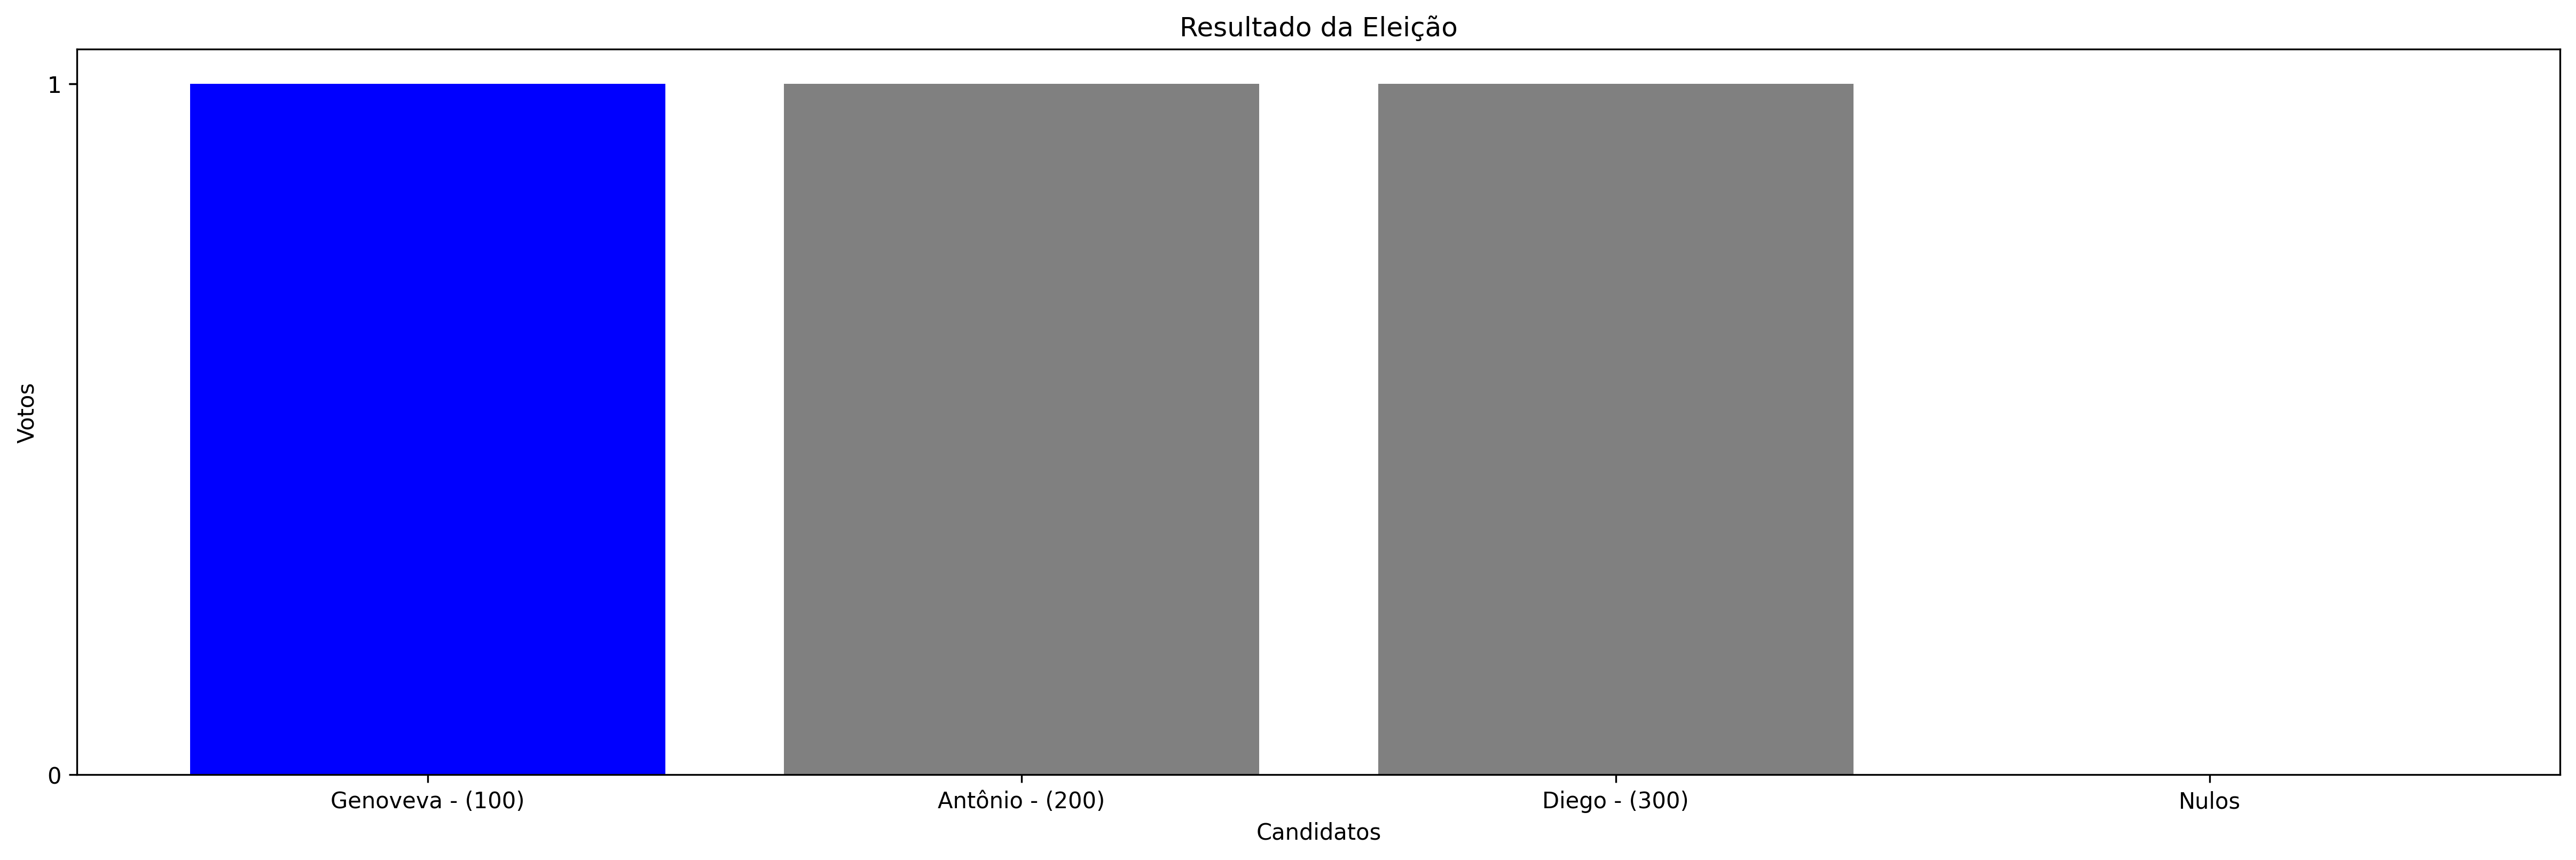

In [ ]:
Morador.apartamentos = {10: Apartamento(10), 20: Apartamento(20), 30: Apartamento(30)}
Urna.ultimo_numero_cadastrado=0
# teste 1
genoveva = Candidato("Genoveva", Morador.apartamentos[10])
antonio = Candidato("Antônio", Morador.apartamentos[20])
diego = Candidato("Diego", Morador.apartamentos[30])
print(genoveva.numero_candidato)
urna = Urna()
urna.cadastrar_apartamento(Morador.apartamentos[10])
urna.cadastrar_apartamento(Morador.apartamentos[20])
urna.cadastrar_apartamento(Morador.apartamentos[30])
print(urna.apartamentos_restantes)
urna.cadastrar_candidato(genoveva)
urna.cadastrar_candidato(genoveva)
urna.cadastrar_candidato(antonio)
urna.cadastrar_candidato(diego)
print(genoveva.numero_candidato)
print(urna.candidatos)
genoveva.votar(urna, 100)
antonio.votar(urna, 200)
diego.votar(urna, 300)
genoveva.votar(urna, 100)
print(genoveva.quantidade_votos)
# genoveva.votar(urna)
print(urna.exibir_resultados())
# urna.candidatos = genoveva # testando setter

<h4>Candidato</h4>
Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0.

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [ ]:
#movido para a primeira célula

<h4>Apartamento</h4>
Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [ ]:
#movido para a primeira célula

<h4>Urna</h4>
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número único para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [ ]:
#movido para a primeira célula

 <h4>O programa principal</h4>
Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

Configuração: o programa deverá utilizar as informações obtidas na etapa anterior para criar uma urna.

Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

In [ ]:
# utilizar um dicionário de moradores para facilitar o preenchimento da classe Moradores? (ANTONIO)
lista_de_moradores = []
dicionario_moradores = {'Vicente':11, 
                        'Cecilia':12, 
                        'Francisco':13, 
                        'Helena':21, 
                        'Caetano':22, 
                        'Benjamin':23, 
                        'Catarina':31, 
                        'Benicio':32, 
                        'Olivia':33, 
                        'Valentim':41, 
                        'Madalena':42, 
                        'Bento':43, 
                        'Luíza':51, 
                        'Manoel':52, 
                        'Gustavo':53}

# Gerar classes Moradores a partir do dicionario_moradores ? (ANTONIO)

for key, value in dicionario_moradores.items():
    key = Morador(key, value) # nome e apartamento da classe Moradores.
    lista_de_moradores.append(key)

AttributeError: 'int' object has no attribute 'adicionar_morador'

In [ ]:
lista_de_moradores[5] #CONTEÚDO DE OBJETO PRINTADO POR MÉTODO __REPR__. (ANTONIO)

'Benjamin'

In [ ]:
### SERIA INTERESSANTE FAZER A VOTAÇÃO FICAR RANDÔMICA ENTRE OS CANDIDADOS ? ### (ANTONIO)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8f7be1a-8cee-420b-800c-2eb975a05445' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>